# Zomato Dataset Analysis
## Alfido Tech Internship – Task 1
### Intern: Mohammed Maahin | Candidate ID: BS/REG/106534

This project involves exploratory data analysis and visualization of the Zomato restaurant dataset. The aim is to uncover insights related to restaurant types, customer ratings, costs, and food trends.

## IMPORTING LIBRARIES

In [1]:
# %pip install seaborn
# %pip install plotly

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set(style="darkgrid")

### LOADING DATASET

In [37]:
df = pd.read_csv("zomato.csv")
df

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56247,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500",Pubs and bars
56248,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,Pubs and bars
56249,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",Pubs and bars
56250,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars


## DATA CLEANING

In [38]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [39]:
# DROPPING UNNECESSARY COLUMNS
df.drop(['address', 'phone', 'dish_liked'], axis=1, inplace=True)

## HANDLING NA VALUES

In [40]:
df.isnull()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
56247,False,False,False,False,False,False,False,False,False,False
56248,False,False,False,True,False,False,False,False,False,False
56249,False,False,False,True,False,False,False,False,False,False
56250,False,False,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum()

name                             16
online_order                     19
book_table                       58
rate                           7838
votes                            78
location                        126
rest_type                       338
cuisines                        203
approx_cost(for two people)     521
listed_in(type)                4610
dtype: int64

In [42]:
df['rate'] = df['rate'].astype(str)
import re

# Keep only rows that match the pattern like 3.5/5
df = df[df['rate'].str.contains(r'^\d+(\.\d+)?/5$', regex=True)]
df['rate'] = df['rate'].apply(lambda x: x.split('/')[0])  # remove /5
df['rate'] = df['rate'].astype(float)  # convert to float

<ipython-input-42-565999ea567b>:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df = df[df['rate'].str.contains(r'^\d+(\.\d+)?/5$', regex=True)]
<ipython-input-42-565999ea567b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].apply(lambda x: x.split('/')[0])  # remove /5
<ipython-input-42-565999ea567b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'] = df['rate'].astype(float)  # conv

In [43]:
# Clean approx_cost column
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')

# Fill missing cost values
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())

# Drop rows with nulls in critical columns
df.dropna(subset=['name', 'online_order', 'book_table', 'rate', 'votes','location', 'rest_type', 'cuisines', 'listed_in(type)'], inplace=True)

<ipython-input-43-3fd1098ce95b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
<ipython-input-43-3fd1098ce95b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')
<ipython-input-43-3fd1098ce95b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [44]:
df = df[~df['book_table'].isnull()]

In [45]:
df.dropna(subset=['online_order', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'votes', 'name'], inplace=True)

## PERFORMING EXPLORATORY DATA ANALYSIS (EDA)

### Counting Top 10 Restaurant Types

<ipython-input-46-22ff296f272d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=rest_type_counts.index, x=rest_type_counts.values, palette='viridis')


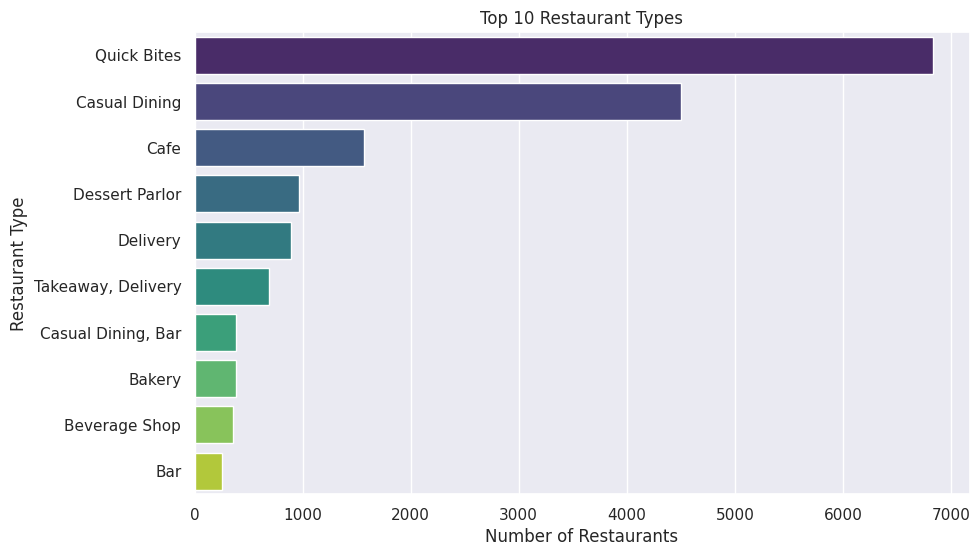

In [46]:
rest_type_counts = df['rest_type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=rest_type_counts.index, x=rest_type_counts.values, palette='viridis')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()

### Finding Top Locations

<ipython-input-47-29f687e057a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette='Set2')


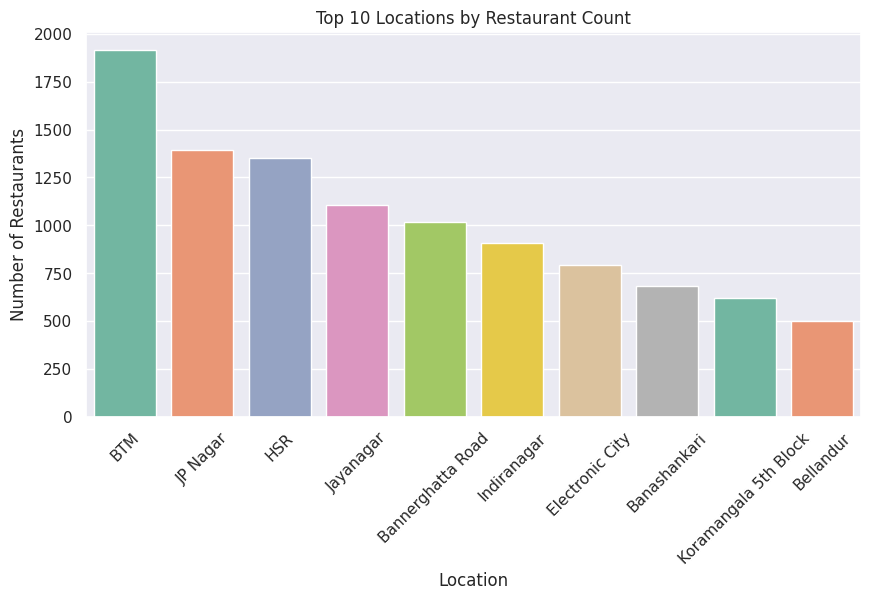

In [47]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='Set2')
plt.xticks(rotation=45)
plt.title('Top 10 Locations by Restaurant Count')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.show()

### Rating Distribution

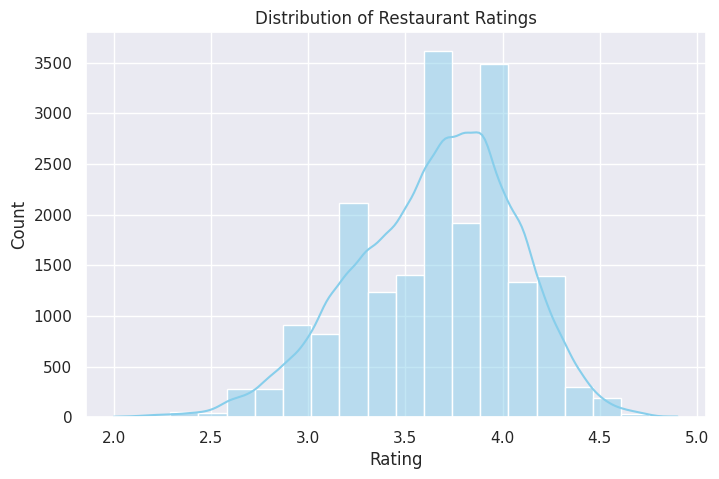

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(df['rate'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### The Pricing Range for Two People

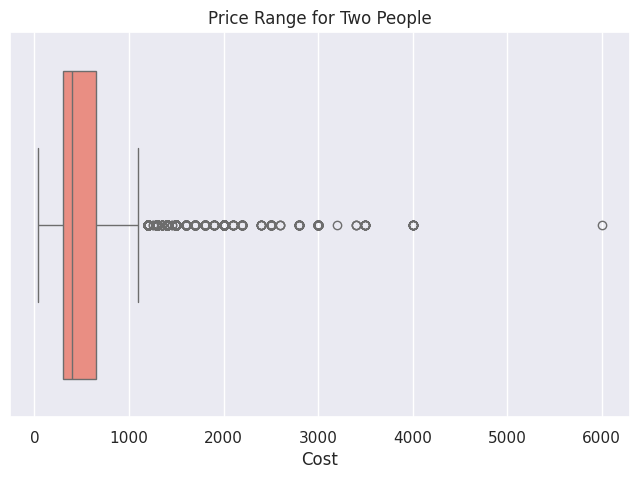

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['approx_cost(for two people)'], color='salmon')
plt.title('Price Range for Two People')
plt.xlabel('Cost')
plt.show()

## Online Order VS Rating

<ipython-input-50-13716c8009b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df, palette='coolwarm')


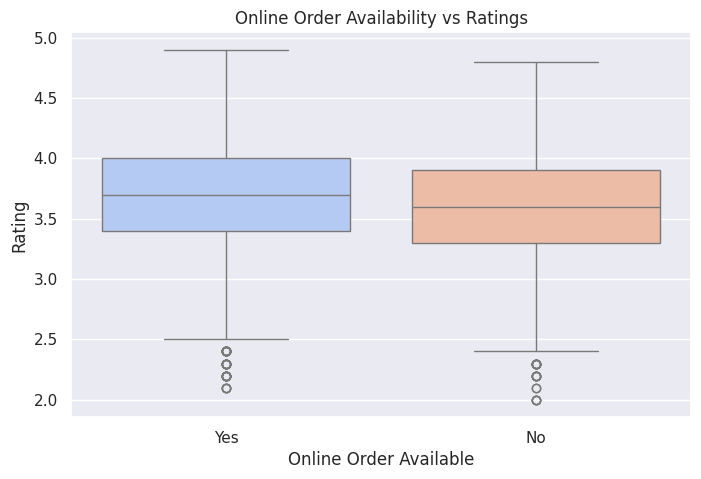

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x='online_order', y='rate', data=df, palette='coolwarm')
plt.title('Online Order Availability vs Ratings')
plt.xlabel('Online Order Available')
plt.ylabel('Rating')
plt.show()

## Table Booking VS Rating 

<ipython-input-52-b0a98e52b977>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='book_table', y='rate', data=df, palette='Spectral')


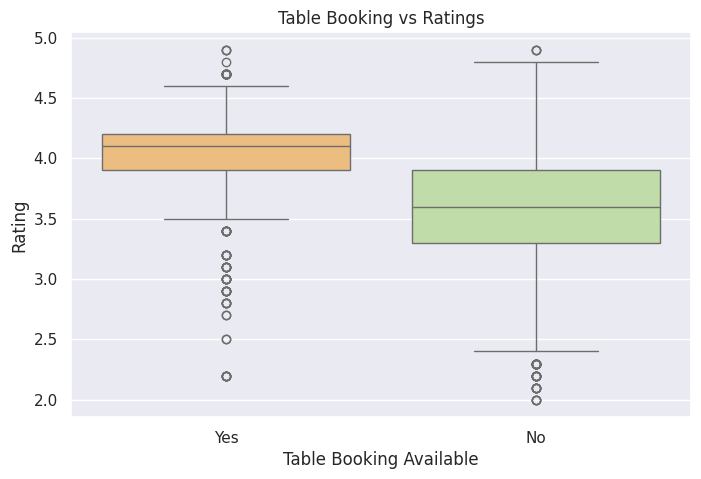

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x='book_table', y='rate', data=df, palette='Spectral')
plt.title('Table Booking vs Ratings')
plt.xlabel('Table Booking Available')
plt.ylabel('Rating')
plt.show()

## Top Popular Cuisines

<ipython-input-53-0c7861ab0b12>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='Set1')


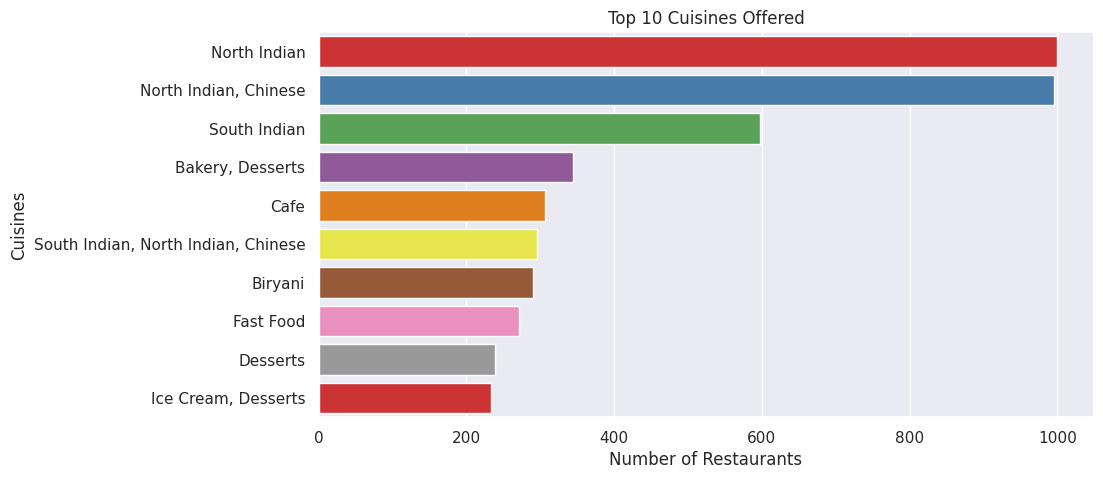

In [53]:
top_cuisines = df['cuisines'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='Set1')
plt.title('Top 10 Cuisines Offered')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.show()

## Votes VS Rating

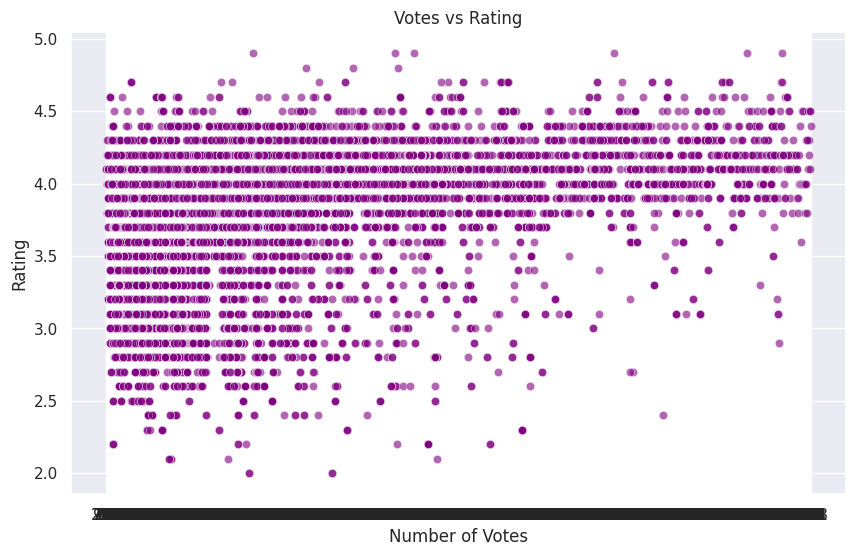

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.6, color='purple')
plt.title('Votes vs Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()

### Key Insights:

- "Quick Bites" is the most common restaurant type, followed by "Casual Dining" and "Cafe".
- BTM and JP Nagar are restaurant hubs with the highest counts.
- Ratings mostly lie between 3.2–4.2, with very few poor or perfect scores.
- Median cost for two people is around ₹400, making dining affordable in most places.
- Online order support correlates with slightly higher ratings.
- Table booking availability reflects better-rated, often premium restaurants.
- North Indian and Chinese cuisines are most offered.
- Higher vote counts typically align with better ratings, reflecting popularity and trust.